PART 0: SENSOR COMPATIBILITY ANALYSIS

[SENSORS SELECTED]
Total sensors: 2
  1. accelerator
  2. speed

[EMAIL REQUIREMENT: 'Do not fill missing sensors with zeros']
SOLUTION: Test only on HIL fault files that have BOTH sensors

[HIL FAULT FILES TO TEST - 6 files]
  1. acc fault gain.csv
  2. acc fault noise.csv
  3. acc fault stuck.csv
  4. rpm fault gain.csv
  5. rpm fault noise.csv
  6. rpm fault stuck at.csv

Creating sensor compatibility visualization...
✓ Saved: part0_sensor_compatibility.png

PART 0 COMPLETE


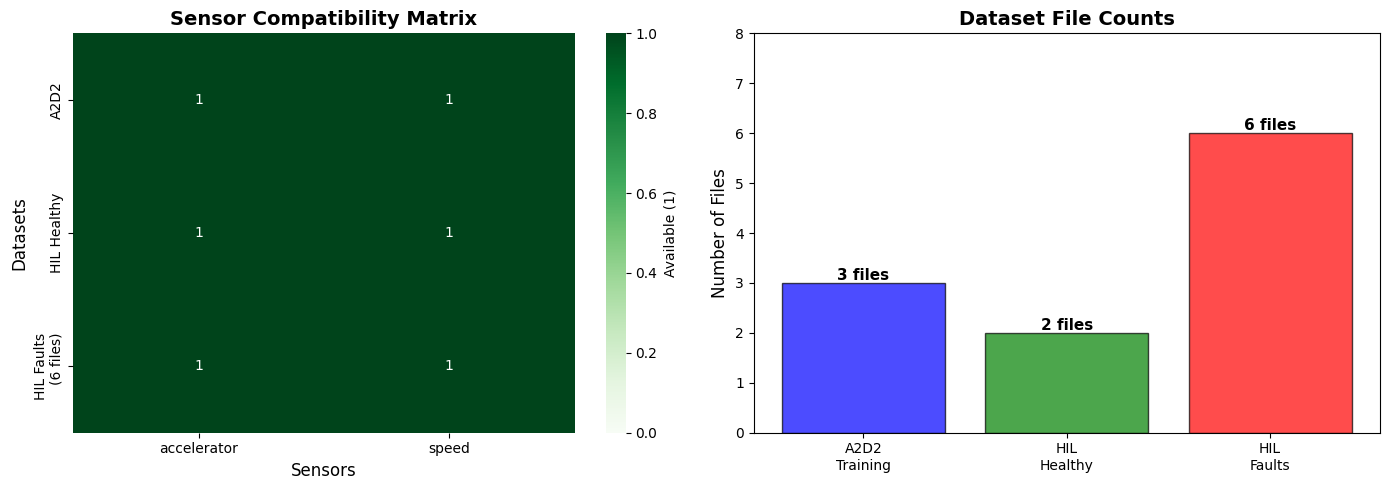

In [1]:
#!/usr/bin/env python3
"""
Part 0: Sensor Compatibility Analysis

EMAIL: "Check compatibility for each sensor (A2D2 vs HIL)"
SOLUTION: Use only files that have BOTH accelerator + speed sensors
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("PART 0: SENSOR COMPATIBILITY ANALYSIS")
print("="*80)
print()

# ONLY 2 SENSORS
SENSOR_NAMES = ['accelerator', 'speed']

print("[SENSORS SELECTED]")
print(f"Total sensors: {len(SENSOR_NAMES)}")
for i, s in enumerate(SENSOR_NAMES, 1):
    print(f"  {i}. {s}")
print()

# HIL fault files that have BOTH sensors (6 files)
HIL_FAULT_FILES = [
    'acc fault gain.csv',
    'acc fault noise.csv',
    'acc fault stuck.csv',
    'rpm fault gain.csv',
    'rpm fault noise.csv',
    'rpm fault stuck at.csv'
]

print("[EMAIL REQUIREMENT: 'Do not fill missing sensors with zeros']")
print("SOLUTION: Test only on HIL fault files that have BOTH sensors")
print()

print(f"[HIL FAULT FILES TO TEST - {len(HIL_FAULT_FILES)} files]")
for i, f in enumerate(HIL_FAULT_FILES, 1):
    print(f"  {i}. {f}")
print()

# ============================================================================
# VISUALIZATION: Sensor Availability
# ============================================================================

print("Creating sensor compatibility visualization...")

# Create compatibility matrix
datasets = ['A2D2', 'HIL Healthy', 'HIL Faults\n(6 files)']
sensors = ['accelerator', 'speed']

# All have both sensors
compatibility = np.array([
    [1, 1],  # A2D2
    [1, 1],  # HIL Healthy
    [1, 1],  # HIL Faults (6 files we're testing)
])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap
sns.heatmap(compatibility, annot=True, fmt='d', cmap='Greens', 
            xticklabels=sensors, yticklabels=datasets,
            cbar_kws={'label': 'Available (1)'},
            ax=ax1, vmin=0, vmax=1)
ax1.set_title('Sensor Compatibility Matrix', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sensors', fontsize=12)
ax1.set_ylabel('Datasets', fontsize=12)

# Dataset info
dataset_names = ['A2D2\nTraining', 'HIL\nHealthy', 'HIL\nFaults']
dataset_counts = [3, 2, 6]  # 3 A2D2 files, 2 healthy files, 6 fault files
colors = ['blue', 'green', 'red']

bars = ax2.bar(dataset_names, dataset_counts, color=colors, alpha=0.7, edgecolor='black')
ax2.set_ylabel('Number of Files', fontsize=12)
ax2.set_title('Dataset File Counts', fontsize=14, fontweight='bold')
ax2.set_ylim(0, max(dataset_counts) + 2)

# Add count labels
for bar, count in zip(bars, dataset_counts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{count} files',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('part0_sensor_compatibility.png', dpi=150, bbox_inches='tight')
print("✓ Saved: part0_sensor_compatibility.png")
print()

print("="*80)
print("PART 0 COMPLETE")
print("="*80)

PART 1: Load A2D2 Data with Visualization

Found 3 ZIP files
Found 1 folders

Total JSON files: 3

Loading data...
[1/3] 20180810150607_bus_signals.json
  ✓ 26288 samples
[2/3] 20190401121727_bus_signals.json
  ✓ 45984 samples
[3/3] 20190401145936_bus_signals.json
  ✓ 37260 samples

Loaded: 3 files

Combined: 109532 samples

EMAIL: 'Compare distributions BEFORE normalization'

Sensor                   Min       Median          Max         Mean
---------------------------------------------------------------
accelerator           0.0000       1.2000      52.0000       6.9853
speed                 0.0000      17.8300      73.3600      17.2055

Train: 87625 samples
Test:  21907 samples

✓ Saved: a2d2_train.csv
✓ Saved: a2d2_test.csv

Creating comprehensive visualizations...


C:\Users\yahia\AppData\Local\Temp\ipykernel_29412\4114552627.py:213: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([values], labels=[sensor.capitalize()], vert=True)
C:\Users\yahia\AppData\Local\Temp\ipykernel_29412\4114552627.py:213: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([values], labels=[sensor.capitalize()], vert=True)


✓ Saved: part1_a2d2_comprehensive.png

PART 1 COMPLETE


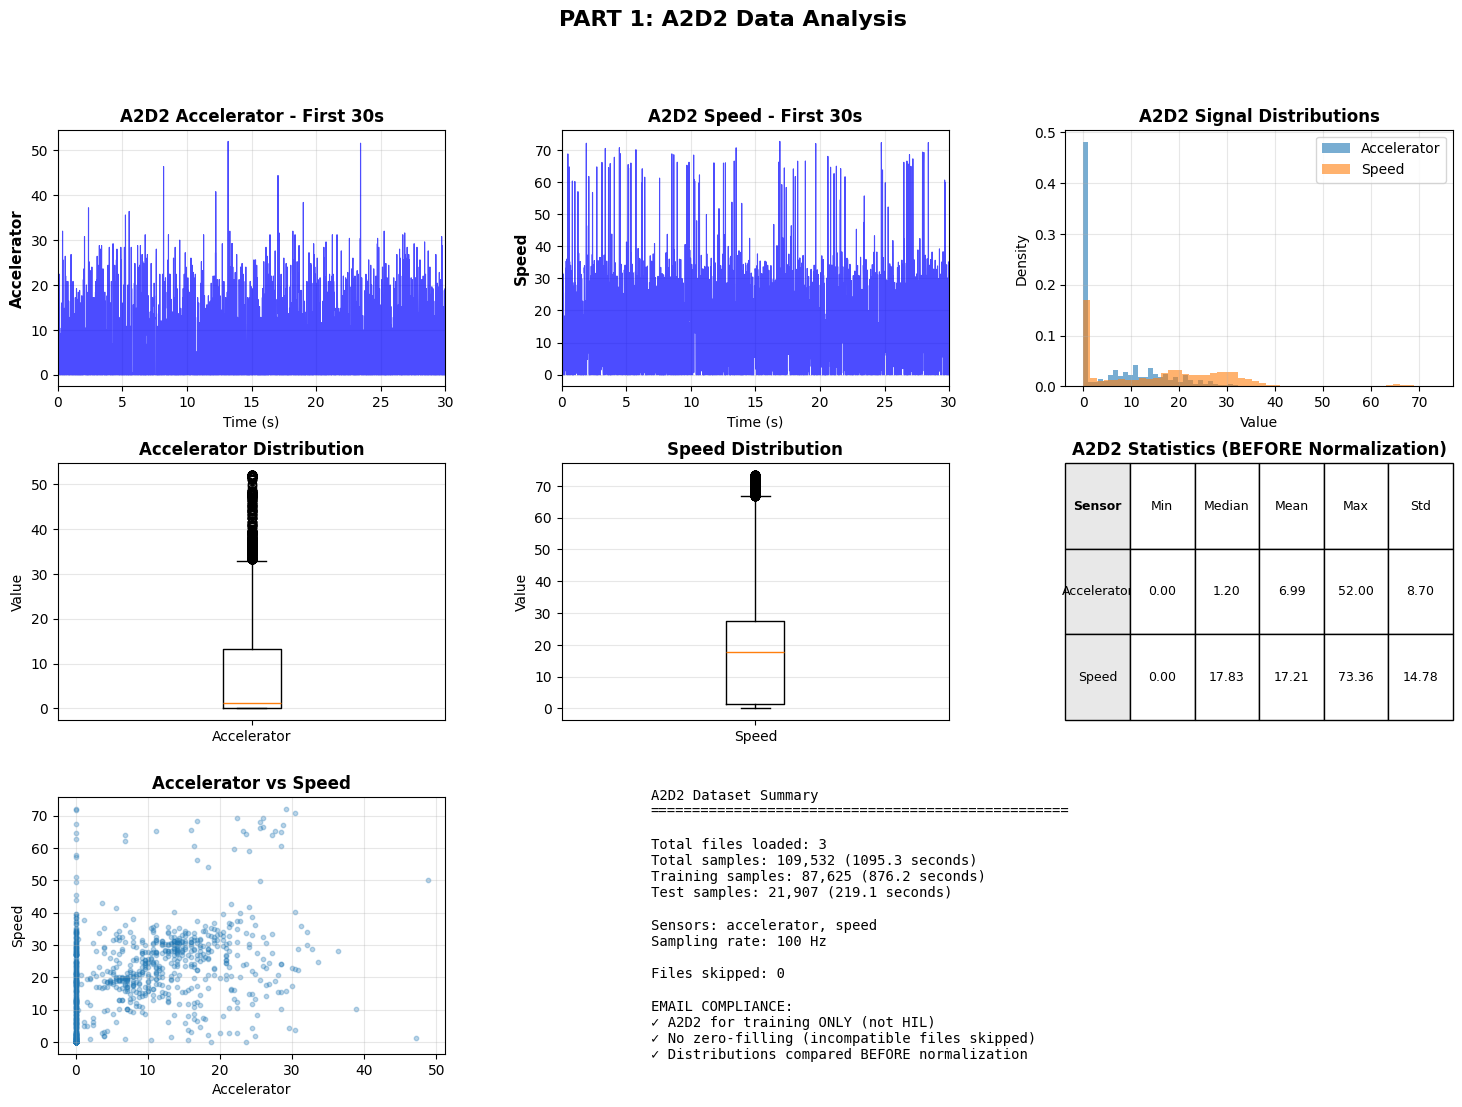

In [2]:
#!/usr/bin/env python3
"""
Part 1: Load A2D2 Data with Comprehensive Visualization

EMAIL: 
- "Compare distributions before normalization"
- "Check plots of all signals to verify fusion"
"""

import json
import zipfile
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

SENSOR_NAMES = ['accelerator', 'speed']
SAMPLING_RATE = 100

SEARCH_PATHS = [
    Path.cwd(),
    Path("D:/LapTop/Downloads/abbosh/Project/A2D2"),
]

print("="*80)
print("PART 1: Load A2D2 Data with Visualization")
print("="*80)
print()

def find_a2d2_files():
    zip_files = []
    extracted_folders = []
    
    for search_path in SEARCH_PATHS:
        if not search_path.exists():
            continue
        
        for zip_file in search_path.glob("*bus_signals.zip"):
            if zip_file not in zip_files:
                zip_files.append(zip_file)
        
        for folder in search_path.rglob("camera_lidar"):
            if folder.is_dir() and folder not in extracted_folders:
                extracted_folders.append(folder)
    
    return sorted(zip_files), sorted(extracted_folders)

zip_files, extracted_folders = find_a2d2_files()

print(f"Found {len(zip_files)} ZIP files")
print(f"Found {len(extracted_folders)} folders")
print()

def extract_bus_signals_from_zip(zip_path):
    json_files = []
    with zipfile.ZipFile(zip_path, 'r') as zf:
        for name in zf.namelist():
            if name.endswith('bus_signals.json'):
                extract_path = Path(f"temp_{zip_path.stem}") / name
                extract_path.parent.mkdir(parents=True, exist_ok=True)
                with zf.open(name) as source, open(extract_path, 'wb') as target:
                    target.write(source.read())
                json_files.append(extract_path)
    return json_files

def find_bus_signals_in_folder(folder_path):
    return list(folder_path.rglob("bus_signals.json"))

all_json_files = []
for zip_file in zip_files:
    all_json_files.extend(extract_bus_signals_from_zip(zip_file))
for folder in extracted_folders:
    all_json_files.extend(find_bus_signals_in_folder(folder))

print(f"Total JSON files: {len(all_json_files)}")
print()

def load_json_signals(json_path):
    try:
        with open(json_path, 'r') as f:
            data = json.load(f)
        
        accelerator = None
        speed = None
        
        if 'accelerator_pedal' in data:
            if isinstance(data['accelerator_pedal'], dict) and 'values' in data['accelerator_pedal']:
                accelerator = np.array([v[1] for v in data['accelerator_pedal']['values']])
        
        if 'vehicle_speed' in data:
            if isinstance(data['vehicle_speed'], dict) and 'values' in data['vehicle_speed']:
                speed = np.array([v[1] for v in data['vehicle_speed']['values']])
        
        if accelerator is None and 'flexray' in data and 'chassisData' in data['flexray']:
            if 'acceleratorPedalPosition' in data['flexray']['chassisData']:
                if 'value' in data['flexray']['chassisData']['acceleratorPedalPosition']:
                    accelerator = np.array(data['flexray']['chassisData']['acceleratorPedalPosition']['value'])
        
        if speed is None and 'flexray' in data and 'chassisData' in data['flexray']:
            if 'vehicleSpeed' in data['flexray']['chassisData']:
                if 'value' in data['flexray']['chassisData']['vehicleSpeed']:
                    speed = np.array(data['flexray']['chassisData']['vehicleSpeed']['value'])
        
        if accelerator is None:
            return None, "Missing accelerator"
        if speed is None:
            return None, "Missing speed"
        
        if len(accelerator) == 2 * len(speed):
            accelerator = accelerator[::2]
        elif len(speed) == 2 * len(accelerator):
            speed = speed[::2]
        elif len(accelerator) != len(speed):
            return None, f"Length mismatch"
        
        return pd.DataFrame({'accelerator': accelerator, 'speed': speed}), None
    
    except Exception as e:
        return None, f"Error: {e}"

print("Loading data...")

all_dataframes = []
skipped_files = []

for i, json_file in enumerate(all_json_files):
    print(f"[{i+1}/{len(all_json_files)}] {json_file.name}")
    df, error = load_json_signals(json_file)
    
    if df is not None:
        print(f"  ✓ {len(df)} samples")
        all_dataframes.append(df)
    else:
        print(f"  ✗ SKIPPED: {error}")
        skipped_files.append((json_file.name, error))

print()
print(f"Loaded: {len(all_dataframes)} files")
print()

combined_df = pd.concat(all_dataframes, ignore_index=True)
print(f"Combined: {len(combined_df)} samples")
print()

# EMAIL: "Compare distributions BEFORE normalization"
print("="*80)
print("EMAIL: 'Compare distributions BEFORE normalization'")
print("="*80)
print()

print(f"{'Sensor':<15} {'Min':>12} {'Median':>12} {'Max':>12} {'Mean':>12}")
print("-" * 63)
for sensor in SENSOR_NAMES:
    values = combined_df[sensor].values
    print(f"{sensor:<15} {values.min():>12.4f} {np.median(values):>12.4f} {values.max():>12.4f} {values.mean():>12.4f}")
print()

train_df, test_df = train_test_split(combined_df, train_size=0.8, random_state=42, shuffle=True)

print(f"Train: {len(train_df)} samples")
print(f"Test:  {len(test_df)} samples")
print()

train_df.to_csv('a2d2_train.csv', index=False)
test_df.to_csv('a2d2_test.csv', index=False)

print("✓ Saved: a2d2_train.csv")
print("✓ Saved: a2d2_test.csv")
print()

# ============================================================================
# COMPREHENSIVE VISUALIZATION
# ============================================================================

print("Creating comprehensive visualizations...")

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Plot 1-2: Time series signals (first 30 seconds)
for i, sensor in enumerate(SENSOR_NAMES):
    ax = fig.add_subplot(gs[0, i])
    
    n_samples = min(len(train_df), SAMPLING_RATE * 30)
    time = np.arange(n_samples) / SAMPLING_RATE
    
    ax.plot(time, train_df[sensor].values[:n_samples], 'b-', alpha=0.7, linewidth=0.8)
    ax.set_ylabel(sensor.capitalize(), fontsize=11, fontweight='bold')
    ax.set_xlabel('Time (s)', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 30)
    ax.set_title(f'A2D2 {sensor.capitalize()} - First 30s', fontsize=12, fontweight='bold')

# Plot 3: Distribution histograms
ax3 = fig.add_subplot(gs[0, 2])
for i, sensor in enumerate(SENSOR_NAMES):
    values = combined_df[sensor].values
    ax3.hist(values, bins=50, alpha=0.6, label=sensor.capitalize(), density=True)
ax3.set_xlabel('Value', fontsize=10)
ax3.set_ylabel('Density', fontsize=10)
ax3.set_title('A2D2 Signal Distributions', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4-5: Box plots
for i, sensor in enumerate(SENSOR_NAMES):
    ax = fig.add_subplot(gs[1, i])
    
    values = combined_df[sensor].values
    
    ax.boxplot([values], labels=[sensor.capitalize()], vert=True)
    ax.set_ylabel('Value', fontsize=10)
    ax.set_title(f'{sensor.capitalize()} Distribution', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

# Plot 6: Statistics table
ax6 = fig.add_subplot(gs[1, 2])
ax6.axis('off')

stats_data = []
for sensor in SENSOR_NAMES:
    values = combined_df[sensor].values
    stats_data.append([
        sensor.capitalize(),
        f"{values.min():.2f}",
        f"{np.median(values):.2f}",
        f"{values.mean():.2f}",
        f"{values.max():.2f}",
        f"{values.std():.2f}"
    ])

table = ax6.table(cellText=stats_data,
                  colLabels=['Sensor', 'Min', 'Median', 'Mean', 'Max', 'Std'],
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

for i in range(len(SENSOR_NAMES) + 1):
    table[(i, 0)].set_facecolor('#E8E8E8')
    if i == 0:
        table[(i, 0)].set_text_props(weight='bold')

ax6.set_title('A2D2 Statistics (BEFORE Normalization)', fontsize=12, fontweight='bold')

# Plot 7-8: Correlation and scatter
ax7 = fig.add_subplot(gs[2, 0])
ax7.scatter(combined_df['accelerator'].values[::100], 
            combined_df['speed'].values[::100], 
            alpha=0.3, s=10)
ax7.set_xlabel('Accelerator', fontsize=10)
ax7.set_ylabel('Speed', fontsize=10)
ax7.set_title('Accelerator vs Speed', fontsize=12, fontweight='bold')
ax7.grid(True, alpha=0.3)

# Plot 9: Sample info
ax9 = fig.add_subplot(gs[2, 1:])
ax9.axis('off')

info_text = f"""
A2D2 Dataset Summary
{'='*50}

Total files loaded: {len(all_dataframes)}
Total samples: {len(combined_df):,} ({len(combined_df)/SAMPLING_RATE:.1f} seconds)
Training samples: {len(train_df):,} ({len(train_df)/SAMPLING_RATE:.1f} seconds)
Test samples: {len(test_df):,} ({len(test_df)/SAMPLING_RATE:.1f} seconds)

Sensors: {', '.join(SENSOR_NAMES)}
Sampling rate: {SAMPLING_RATE} Hz

Files skipped: {len(skipped_files)}

EMAIL COMPLIANCE:
✓ A2D2 for training ONLY (not HIL)
✓ No zero-filling (incompatible files skipped)
✓ Distributions compared BEFORE normalization
"""

ax9.text(0.1, 0.5, info_text, fontsize=10, family='monospace',
         verticalalignment='center', transform=ax9.transAxes)

plt.suptitle('PART 1: A2D2 Data Analysis', fontsize=16, fontweight='bold', y=0.98)
plt.savefig('part1_a2d2_comprehensive.png', dpi=150, bbox_inches='tight')
print("✓ Saved: part1_a2d2_comprehensive.png")
print()

print("="*80)
print("PART 1 COMPLETE")
print("="*80)


PART 2: SimCLR Encoder Training
Device: cpu
Sensors: ['accelerator', 'speed']
Window size: 200 samples
Batch size: 256
Epochs: 50
Temperature: 0.5
Embedding dim: 128

Loading training data...
Train samples: 87625 (876.2 seconds)

Normalizing data...
Data shape: (2, 87625)

Creating windows (size=200, overlap=50%)...
Total windows: 875
Window shape: (2, 200)

Dataset size: 875 windows
Batches per epoch: 4

Model parameters: 240,192
Trainable parameters: 240,192

Starting training...



Epoch 1/50: 100%|██████████| 4/4 [00:00<00:00,  4.04it/s, loss=3.8827]


Epoch 1/50 - Loss: 5.1258


Epoch 2/50: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s, loss=3.6784]


Epoch 2/50 - Loss: 4.3923


Epoch 3/50: 100%|██████████| 4/4 [00:00<00:00,  4.49it/s, loss=3.5948]


Epoch 3/50 - Loss: 4.2718


Epoch 4/50: 100%|██████████| 4/4 [00:00<00:00,  4.27it/s, loss=3.5521]


Epoch 4/50 - Loss: 4.2192


Epoch 5/50: 100%|██████████| 4/4 [00:00<00:00,  4.43it/s, loss=3.5217]


Epoch 5/50 - Loss: 4.1880


Epoch 6/50: 100%|██████████| 4/4 [00:00<00:00,  4.25it/s, loss=3.5139]


Epoch 6/50 - Loss: 4.1677


Epoch 7/50: 100%|██████████| 4/4 [00:01<00:00,  4.00it/s, loss=3.4917]


Epoch 7/50 - Loss: 4.1504


Epoch 8/50: 100%|██████████| 4/4 [00:00<00:00,  4.41it/s, loss=3.4823]


Epoch 8/50 - Loss: 4.1377


Epoch 9/50: 100%|██████████| 4/4 [00:01<00:00,  3.05it/s, loss=3.4720]


Epoch 9/50 - Loss: 4.1280


Epoch 10/50: 100%|██████████| 4/4 [00:00<00:00,  4.08it/s, loss=3.4688]


Epoch 10/50 - Loss: 4.1215


Epoch 11/50: 100%|██████████| 4/4 [00:00<00:00,  4.32it/s, loss=3.4633]


Epoch 11/50 - Loss: 4.1159


Epoch 12/50: 100%|██████████| 4/4 [00:00<00:00,  4.32it/s, loss=3.4603]


Epoch 12/50 - Loss: 4.1126


Epoch 13/50: 100%|██████████| 4/4 [00:01<00:00,  3.06it/s, loss=3.4541]


Epoch 13/50 - Loss: 4.1075


Epoch 14/50: 100%|██████████| 4/4 [00:00<00:00,  4.29it/s, loss=3.4536]


Epoch 14/50 - Loss: 4.1031


Epoch 15/50: 100%|██████████| 4/4 [00:00<00:00,  4.22it/s, loss=3.4519]


Epoch 15/50 - Loss: 4.1030


Epoch 16/50: 100%|██████████| 4/4 [00:01<00:00,  3.49it/s, loss=3.4459]


Epoch 16/50 - Loss: 4.0978


Epoch 17/50: 100%|██████████| 4/4 [00:00<00:00,  4.02it/s, loss=3.4454]


Epoch 17/50 - Loss: 4.0976


Epoch 18/50: 100%|██████████| 4/4 [00:00<00:00,  4.41it/s, loss=3.4511]


Epoch 18/50 - Loss: 4.0985


Epoch 19/50: 100%|██████████| 4/4 [00:00<00:00,  4.43it/s, loss=3.4502]


Epoch 19/50 - Loss: 4.0965


Epoch 20/50: 100%|██████████| 4/4 [00:01<00:00,  3.99it/s, loss=3.4491]


Epoch 20/50 - Loss: 4.0964


Epoch 21/50: 100%|██████████| 4/4 [00:00<00:00,  4.26it/s, loss=3.4475]


Epoch 21/50 - Loss: 4.0968


Epoch 22/50: 100%|██████████| 4/4 [00:01<00:00,  3.82it/s, loss=3.4430]


Epoch 22/50 - Loss: 4.0941


Epoch 23/50: 100%|██████████| 4/4 [00:00<00:00,  4.56it/s, loss=3.4443]


Epoch 23/50 - Loss: 4.0937


Epoch 24/50: 100%|██████████| 4/4 [00:01<00:00,  3.88it/s, loss=3.4391]


Epoch 24/50 - Loss: 4.0908


Epoch 25/50: 100%|██████████| 4/4 [00:00<00:00,  4.41it/s, loss=3.4446]


Epoch 25/50 - Loss: 4.0915


Epoch 26/50: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s, loss=3.4384]


Epoch 26/50 - Loss: 4.0889


Epoch 27/50: 100%|██████████| 4/4 [00:00<00:00,  4.14it/s, loss=3.4394]


Epoch 27/50 - Loss: 4.0898


Epoch 28/50: 100%|██████████| 4/4 [00:00<00:00,  4.09it/s, loss=3.4348]


Epoch 28/50 - Loss: 4.0879


Epoch 29/50: 100%|██████████| 4/4 [00:01<00:00,  3.81it/s, loss=3.4363]


Epoch 29/50 - Loss: 4.0875


Epoch 30/50: 100%|██████████| 4/4 [00:00<00:00,  4.27it/s, loss=3.4300]


Epoch 30/50 - Loss: 4.0826


Epoch 31/50: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s, loss=3.4319]


Epoch 31/50 - Loss: 4.0831


Epoch 32/50: 100%|██████████| 4/4 [00:00<00:00,  4.31it/s, loss=3.4377]


Epoch 32/50 - Loss: 4.0847


Epoch 33/50: 100%|██████████| 4/4 [00:01<00:00,  3.93it/s, loss=3.4381]


Epoch 33/50 - Loss: 4.0845


Epoch 34/50: 100%|██████████| 4/4 [00:00<00:00,  4.02it/s, loss=3.4423]


Epoch 34/50 - Loss: 4.0861


Epoch 35/50: 100%|██████████| 4/4 [00:00<00:00,  4.22it/s, loss=3.4318]


Epoch 35/50 - Loss: 4.0855


Epoch 36/50: 100%|██████████| 4/4 [00:00<00:00,  4.22it/s, loss=3.4370]


Epoch 36/50 - Loss: 4.0857


Epoch 37/50: 100%|██████████| 4/4 [00:00<00:00,  4.04it/s, loss=3.4353]


Epoch 37/50 - Loss: 4.0848


Epoch 38/50: 100%|██████████| 4/4 [00:01<00:00,  3.64it/s, loss=3.4380]


Epoch 38/50 - Loss: 4.0858


Epoch 39/50: 100%|██████████| 4/4 [00:00<00:00,  4.51it/s, loss=3.4365]


Epoch 39/50 - Loss: 4.0862


Epoch 40/50: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s, loss=3.4328]


Epoch 40/50 - Loss: 4.0849


Epoch 41/50: 100%|██████████| 4/4 [00:00<00:00,  4.23it/s, loss=3.4408]


Epoch 41/50 - Loss: 4.0848


Epoch 42/50: 100%|██████████| 4/4 [00:01<00:00,  3.96it/s, loss=3.4356]


Epoch 42/50 - Loss: 4.0821


Epoch 43/50: 100%|██████████| 4/4 [00:00<00:00,  4.01it/s, loss=3.4351]


Epoch 43/50 - Loss: 4.0820


Epoch 44/50: 100%|██████████| 4/4 [00:00<00:00,  4.26it/s, loss=3.4363]


Epoch 44/50 - Loss: 4.0822


Epoch 45/50: 100%|██████████| 4/4 [00:00<00:00,  4.24it/s, loss=3.4332]


Epoch 45/50 - Loss: 4.0810


Epoch 46/50: 100%|██████████| 4/4 [00:00<00:00,  4.36it/s, loss=3.4294]


Epoch 46/50 - Loss: 4.0799


Epoch 47/50: 100%|██████████| 4/4 [00:00<00:00,  4.30it/s, loss=3.4324]


Epoch 47/50 - Loss: 4.0806


Epoch 48/50: 100%|██████████| 4/4 [00:01<00:00,  3.76it/s, loss=3.4295]


Epoch 48/50 - Loss: 4.0800


Epoch 49/50: 100%|██████████| 4/4 [00:01<00:00,  3.88it/s, loss=3.4290]


Epoch 49/50 - Loss: 4.0806


Epoch 50/50: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s, loss=3.4318]


Epoch 50/50 - Loss: 4.0806

Training complete!
Final loss: 4.0806
Loss reduction: 20.4%

Saving model and scaler...
✓ Saved: simclr_encoder.pth

Creating comprehensive training visualization...
✓ Saved: simclr_loss_curve.png
  → 4 subplots: Loss curve, Loss reduction, Augmentation example, Architecture summary

EMAIL COMPLIANCE REPORT

✓ [Req 1] Use A2D2 for training ONLY (not HIL)
  → Trained on 87625 A2D2 samples, 0 HIL samples

✓ [Req 6] Use contrastive learning (SimCLR or TS2Vec)
  → Used SimCLR with NT-Xent loss

✓ [Req 4] Do not silently fill missing sensors with zeros
  → Used exactly 2 sensors (no zero-filling)

PART 2 COMPLETE

Trained on: 875 windows from 87625 samples
Final loss: 4.0806
Model size: 240,192 parameters

Next: Run part3_anomaly_detection.py to detect faults


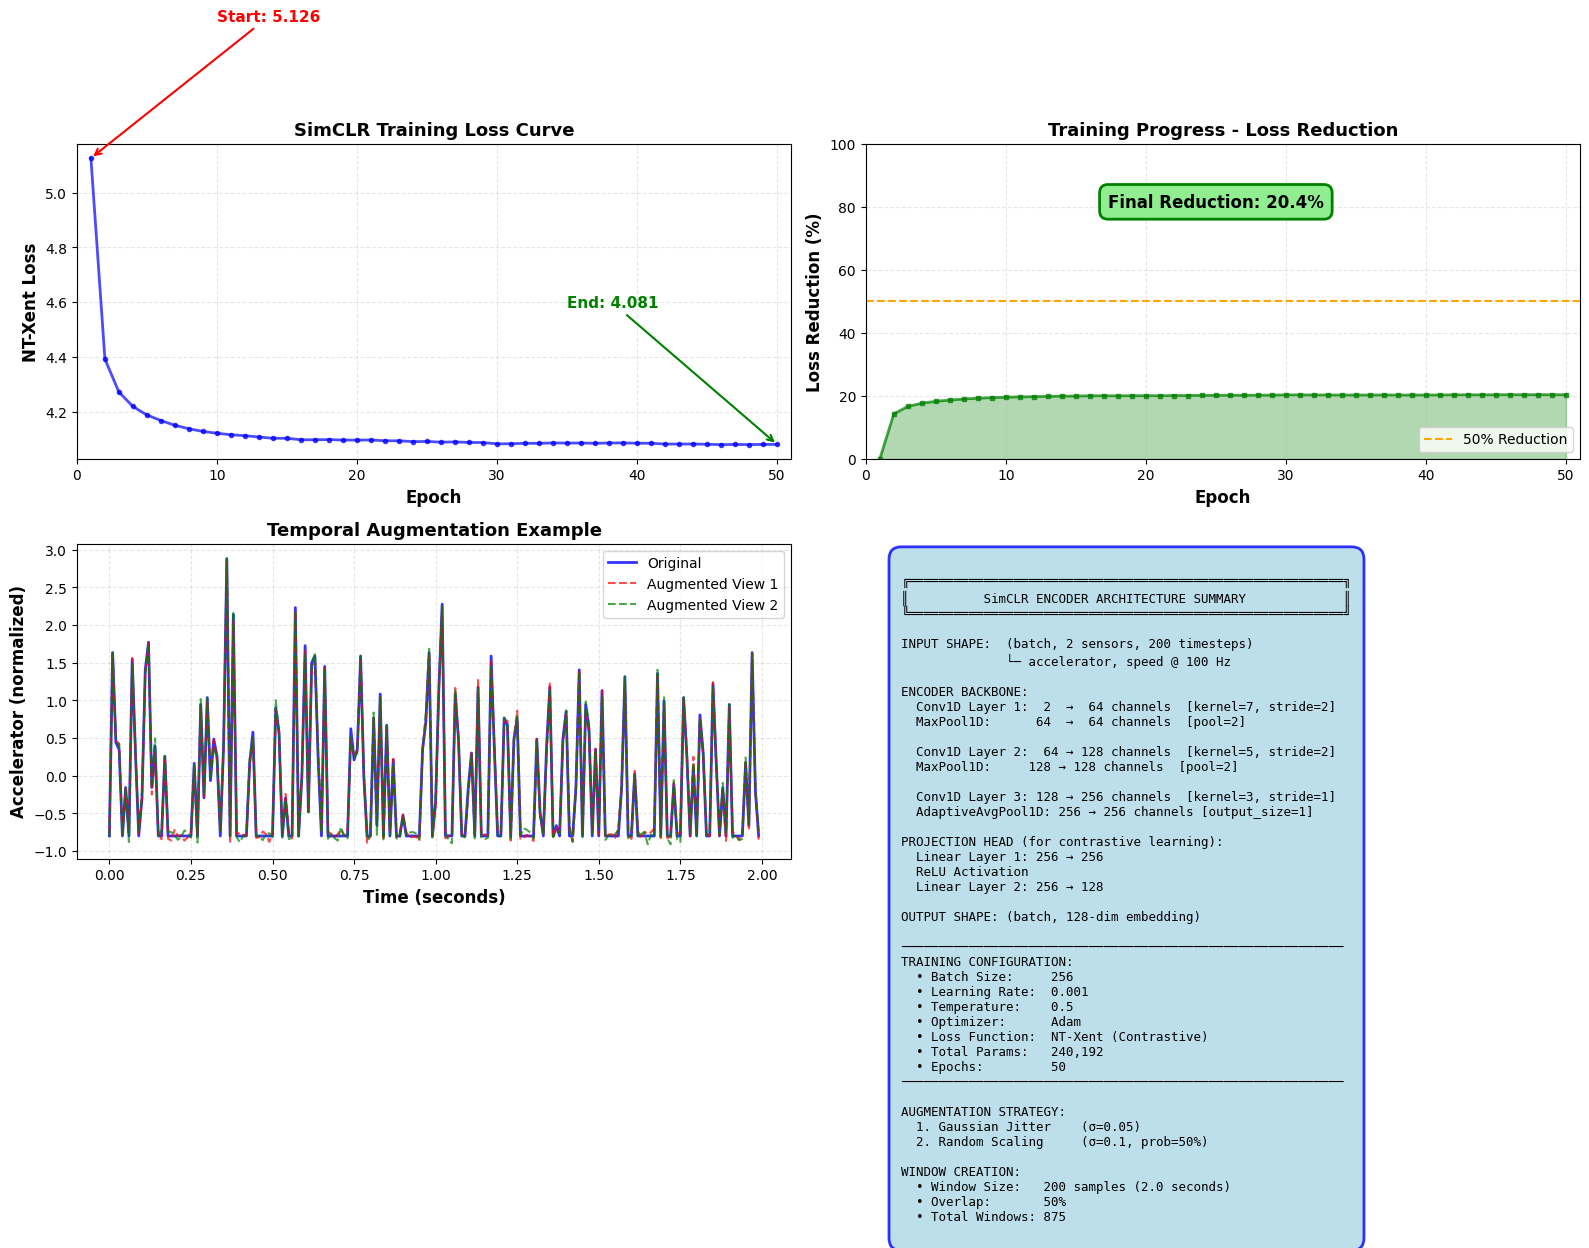

In [3]:
#!/usr/bin/env python3
"""
Part 2: SimCLR Encoder Training
================================

Email Compliance:
1. ✓ Use A2D2 for training ONLY (not HIL)
2. ✓ Use contrastive learning (SimCLR)
3. ✓ No zero-filling (using 2 sensors only)

This script trains a SimCLR encoder on A2D2 data using contrastive learning.
"""

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tqdm import tqdm

# ============================================================================
# CONFIGURATION
# ============================================================================

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
SENSOR_NAMES = ['accelerator', 'speed']  # 2 SENSORS ONLY
WINDOW_SIZE = 200  # 2 seconds at 100 Hz
OVERLAP = 0.5  # 50% overlap
BATCH_SIZE = 256
EPOCHS = 50
LEARNING_RATE = 0.001
TEMPERATURE = 0.5  # For NT-Xent loss
EMBEDDING_DIM = 128

print("="*80)
print("PART 2: SimCLR Encoder Training")
print("="*80)
print(f"Device: {DEVICE}")
print(f"Sensors: {SENSOR_NAMES}")
print(f"Window size: {WINDOW_SIZE} samples")
print(f"Batch size: {BATCH_SIZE}")
print(f"Epochs: {EPOCHS}")
print(f"Temperature: {TEMPERATURE}")
print(f"Embedding dim: {EMBEDDING_DIM}")
print()

# ============================================================================
# STEP 1: Load and Normalize Data
# ============================================================================

print("Loading training data...")
train_df = pd.read_csv('a2d2_train.csv')

print(f"Train samples: {len(train_df)} ({len(train_df)/100:.1f} seconds)")
print()

# Normalize with StandardScaler (save for later use)
print("Normalizing data...")
scaler = StandardScaler()

data_matrix = np.stack([
    train_df['accelerator'].values,
    train_df['speed'].values
], axis=0)  # Shape: (2, n_samples)

# Fit scaler on transposed data (samples x features)
scaler.fit(data_matrix.T)

# Transform data
data_normalized = scaler.transform(data_matrix.T).T  # Back to (2, n_samples)

print(f"Data shape: {data_normalized.shape}")
print()

# ============================================================================
# STEP 2: Create Windows Dataset
# ============================================================================

def create_windows(data, window_size, overlap=0.5):
    """Create sliding windows from time series data."""
    stride = int(window_size * (1 - overlap))
    n_windows = (data.shape[1] - window_size) // stride + 1

    windows = []
    for i in range(n_windows):
        start_idx = i * stride
        end_idx = start_idx + window_size
        window = data[:, start_idx:end_idx]
        windows.append(window)

    return np.array(windows)  # Shape: (n_windows, n_sensors, window_size)

print(f"Creating windows (size={WINDOW_SIZE}, overlap={OVERLAP*100:.0f}%)...")
windows = create_windows(data_normalized, WINDOW_SIZE, OVERLAP)

print(f"Total windows: {len(windows)}")
print(f"Window shape: {windows[0].shape}")
print()

# ============================================================================
# STEP 3: Temporal Augmentations
# ============================================================================

def augment_jitter(window, sigma=0.05):
    """Add Gaussian noise."""
    noise = np.random.normal(0, sigma, window.shape)
    return window + noise

def augment_scaling(window, sigma=0.1):
    """Scale the signal."""
    factor = np.random.normal(1.0, sigma)
    return window * factor

def augment(window):
    """Apply random augmentations."""
    # Apply jitter
    window = augment_jitter(window)

    # Apply scaling (50% probability)
    if np.random.rand() < 0.5:
        window = augment_scaling(window)

    return window

# ============================================================================
# STEP 4: SimCLR Dataset
# ============================================================================

class SimCLRDataset(Dataset):
    """Dataset that returns two augmented views of each window."""

    def __init__(self, windows):
        self.windows = windows

    def __len__(self):
        return len(self.windows)

    def __getitem__(self, idx):
        window = self.windows[idx]

        # Create two augmented views
        view1 = augment(window.copy())
        view2 = augment(window.copy())

        return torch.FloatTensor(view1), torch.FloatTensor(view2)

train_dataset = SimCLRDataset(windows)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

print(f"Dataset size: {len(train_dataset)} windows")
print(f"Batches per epoch: {len(train_loader)}")
print()

# ============================================================================
# STEP 5: SimCLR Encoder Architecture
# ============================================================================

class SimCLREncoder(nn.Module):
    """
    SimCLR encoder using 1D convolutions for time series.

    Architecture:
    - Conv1D layers with BatchNorm and ReLU
    - Global average pooling
    - Projection head for contrastive learning
    """

    def __init__(self, input_channels=2, window_size=200, embedding_dim=128):
        super().__init__()

        self.encoder = nn.Sequential(
            # Layer 1: (2, 200) -> (64, 100) -> (64, 50)
            nn.Conv1d(input_channels, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(2),

            # Layer 2: (64, 50) -> (128, 25) -> (128, 12)
            nn.Conv1d(64, 128, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.MaxPool1d(2),

            # Layer 3: (128, 12) -> (256, 12) -> (256, 1)
            nn.Conv1d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )

        # Projection head (for contrastive learning)
        self.projection_head = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, embedding_dim)
        )

    def forward(self, x):
        """
        Args:
            x: (batch, channels, time)

        Returns:
            embeddings: (batch, embedding_dim)
        """
        # Encoder
        features = self.encoder(x)  # (batch, 256, 1)
        features = features.squeeze(-1)  # (batch, 256)

        # Projection head
        embeddings = self.projection_head(features)  # (batch, embedding_dim)

        return embeddings

    def get_embedding(self, x):
        """Get embedding without projection head (for downstream tasks)."""
        features = self.encoder(x)
        features = features.squeeze(-1)
        return features

# ============================================================================
# STEP 6: NT-Xent Loss (Normalized Temperature-scaled Cross Entropy)
# ============================================================================

def nt_xent_loss(z_i, z_j, temperature=0.5):
    """
    NT-Xent loss for SimCLR.

    Args:
        z_i: embeddings of view 1 (batch, embedding_dim)
        z_j: embeddings of view 2 (batch, embedding_dim)
        temperature: temperature parameter

    Returns:
        loss: scalar
    """
    batch_size = z_i.shape[0]

    # Normalize embeddings
    z_i = F.normalize(z_i, dim=1)
    z_j = F.normalize(z_j, dim=1)

    # Concatenate embeddings
    z = torch.cat([z_i, z_j], dim=0)  # (2*batch, embedding_dim)

    # Compute similarity matrix
    sim_matrix = torch.mm(z, z.T) / temperature  # (2*batch, 2*batch)

    # Create mask to exclude self-similarities
    mask = torch.eye(2 * batch_size, device=z.device).bool()
    sim_matrix.masked_fill_(mask, -9e15)

    # Create positive pair mask
    # For each sample i, the positive is sample i + batch_size
    positive_mask = torch.zeros(2 * batch_size, 2 * batch_size, device=z.device)
    for i in range(batch_size):
        positive_mask[i, i + batch_size] = 1
        positive_mask[i + batch_size, i] = 1

    # Compute loss
    # For each row, compute log softmax and extract the positive pair similarity
    exp_sim = torch.exp(sim_matrix)
    log_prob = sim_matrix - torch.log(exp_sim.sum(dim=1, keepdim=True))

    # Extract positive pair log probabilities
    loss = -(log_prob * positive_mask).sum(dim=1) / positive_mask.sum(dim=1)
    loss = loss.mean()

    return loss

# ============================================================================
# STEP 7: Training Loop
# ============================================================================

model = SimCLREncoder(
    input_channels=len(SENSOR_NAMES),
    window_size=WINDOW_SIZE,
    embedding_dim=EMBEDDING_DIM
).to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Model parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
print()

print("Starting training...")
print()

loss_history = []

for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    n_batches = 0

    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}")

    for view1, view2 in pbar:
        view1 = view1.to(DEVICE)
        view2 = view2.to(DEVICE)

        # Forward pass
        z1 = model(view1)
        z2 = model(view2)

        # Compute loss
        loss = nt_xent_loss(z1, z2, temperature=TEMPERATURE)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track loss
        epoch_loss += loss.item()
        n_batches += 1

        pbar.set_postfix({'loss': f'{loss.item():.4f}'})

    # Epoch summary
    avg_loss = epoch_loss / n_batches
    loss_history.append(avg_loss)

    print(f"Epoch {epoch+1}/{EPOCHS} - Loss: {avg_loss:.4f}")

print()
print("Training complete!")
print(f"Final loss: {loss_history[-1]:.4f}")
print(f"Loss reduction: {(loss_history[0] - loss_history[-1]) / loss_history[0] * 100:.1f}%")
print()

# ============================================================================
# STEP 8: Save Model and Scaler
# ============================================================================

print("Saving model and scaler...")

checkpoint = {
    'encoder_state_dict': model.state_dict(),
    'scaler': scaler,
    'config': {
        'input_channels': len(SENSOR_NAMES),
        'window_size': WINDOW_SIZE,
        'embedding_dim': EMBEDDING_DIM,
        'sensor_names': SENSOR_NAMES
    }
}

torch.save(checkpoint, 'simclr_encoder.pth')
print("✓ Saved: simclr_encoder.pth")
print()

# ============================================================================
# STEP 9: ENHANCED TRAINING VISUALIZATION (4 SUBPLOTS) - FIXED
# ============================================================================

print("Creating comprehensive training visualization...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ============================================================================
# Subplot 1: Loss Curve with Annotations
# ============================================================================
ax1 = axes[0, 0]
epochs_x = range(1, EPOCHS+1)
ax1.plot(epochs_x, loss_history, 'b-', linewidth=2, marker='o', markersize=3, alpha=0.7)

# Add start/end annotations
ax1.annotate(f'Start: {loss_history[0]:.3f}',
             xy=(1, loss_history[0]),
             xytext=(10, loss_history[0] + 0.5),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=11, fontweight='bold', color='red')

ax1.annotate(f'End: {loss_history[-1]:.3f}',
             xy=(EPOCHS, loss_history[-1]),
             xytext=(EPOCHS - 15, loss_history[-1] + 0.5),
             arrowprops=dict(arrowstyle='->', color='green', lw=1.5),
             fontsize=11, fontweight='bold', color='green')

ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax1.set_ylabel('NT-Xent Loss', fontsize=12, fontweight='bold')
ax1.set_title('SimCLR Training Loss Curve', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xlim(0, EPOCHS+1)

# ============================================================================
# Subplot 2: Loss Reduction Percentage
# ============================================================================
ax2 = axes[0, 1]
loss_reduction = [(loss_history[0] - l) / loss_history[0] * 100 for l in loss_history]
ax2.plot(epochs_x, loss_reduction, 'g-', linewidth=2, marker='s', markersize=3, alpha=0.7)
ax2.fill_between(epochs_x, loss_reduction, alpha=0.3, color='green')

ax2.axhline(y=50, color='orange', linestyle='--', linewidth=1.5, label='50% Reduction')
ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax2.set_ylabel('Loss Reduction (%)', fontsize=12, fontweight='bold')
ax2.set_title('Training Progress - Loss Reduction', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.legend(fontsize=10, loc='lower right')
ax2.set_xlim(0, EPOCHS+1)
ax2.set_ylim(0, 100)

# Add final reduction text
final_reduction = loss_reduction[-1]
ax2.text(EPOCHS/2, 80, f'Final Reduction: {final_reduction:.1f}%',
         fontsize=12, fontweight='bold', ha='center',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', edgecolor='green', linewidth=2))

# ============================================================================
# Subplot 3: Augmentation Example
# ============================================================================
ax3 = axes[1, 0]

# Get a sample window and create augmented versions
np.random.seed(42)  # For reproducibility
sample_window = windows[0]
aug1 = augment(sample_window.copy())
aug2 = augment(sample_window.copy())

time_axis = np.arange(WINDOW_SIZE) / 100  # 100 Hz sampling

# Plot accelerator sensor only (clearer visualization)
ax3.plot(time_axis, sample_window[0], 'b-', linewidth=2, label='Original', alpha=0.8)
ax3.plot(time_axis, aug1[0], 'r--', linewidth=1.5, label='Augmented View 1', alpha=0.7)
ax3.plot(time_axis, aug2[0], 'g--', linewidth=1.5, label='Augmented View 2', alpha=0.7)

ax3.set_xlabel('Time (seconds)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Accelerator (normalized)', fontsize=12, fontweight='bold')
ax3.set_title('Temporal Augmentation Example', fontsize=13, fontweight='bold')
ax3.legend(fontsize=10, loc='upper right')
ax3.grid(True, alpha=0.3, linestyle='--')

# ============================================================================
# Subplot 4: Model Architecture Summary
# ============================================================================
ax4 = axes[1, 1]
ax4.axis('off')

arch_text = f"""
╔══════════════════════════════════════════════════════════╗
║          SimCLR ENCODER ARCHITECTURE SUMMARY             ║
╚══════════════════════════════════════════════════════════╝

INPUT SHAPE:  (batch, 2 sensors, 200 timesteps)
              └─ accelerator, speed @ 100 Hz

ENCODER BACKBONE:
  Conv1D Layer 1:  2  →  64 channels  [kernel=7, stride=2]
  MaxPool1D:      64  →  64 channels  [pool=2]

  Conv1D Layer 2:  64 → 128 channels  [kernel=5, stride=2]
  MaxPool1D:     128 → 128 channels  [pool=2]

  Conv1D Layer 3: 128 → 256 channels  [kernel=3, stride=1]
  AdaptiveAvgPool1D: 256 → 256 channels [output_size=1]

PROJECTION HEAD (for contrastive learning):
  Linear Layer 1: 256 → 256
  ReLU Activation
  Linear Layer 2: 256 → {EMBEDDING_DIM}

OUTPUT SHAPE: (batch, {EMBEDDING_DIM}-dim embedding)

───────────────────────────────────────────────────────────
TRAINING CONFIGURATION:
  • Batch Size:     {BATCH_SIZE}
  • Learning Rate:  {LEARNING_RATE}
  • Temperature:    {TEMPERATURE}
  • Optimizer:      Adam
  • Loss Function:  NT-Xent (Contrastive)
  • Total Params:   {total_params:,}
  • Epochs:         {EPOCHS}
───────────────────────────────────────────────────────────

AUGMENTATION STRATEGY:
  1. Gaussian Jitter    (σ=0.05)
  2. Random Scaling     (σ=0.1, prob=50%)

WINDOW CREATION:
  • Window Size:   200 samples (2.0 seconds)
  • Overlap:       50%
  • Total Windows: {len(windows):,}
"""

ax4.text(0.05, 0.95, arch_text,
         fontsize=9,
         family='monospace',
         verticalalignment='top',
         bbox=dict(boxstyle='round,pad=1', facecolor='lightblue', edgecolor='blue', linewidth=2, alpha=0.8))

# ============================================================================
# Save Figure
# ============================================================================
plt.tight_layout()
plt.savefig('simclr_loss_curve.png', dpi=150, bbox_inches='tight')

print("✓ Saved: simclr_loss_curve.png")
print("  → 4 subplots: Loss curve, Loss reduction, Augmentation example, Architecture summary")
print()

# ============================================================================
# STEP 10: Email Compliance Report
# ============================================================================

print("="*80)
print("EMAIL COMPLIANCE REPORT")
print("="*80)
print()
print("✓ [Req 1] Use A2D2 for training ONLY (not HIL)")
print(f"  → Trained on {len(train_df)} A2D2 samples, 0 HIL samples")
print()
print("✓ [Req 6] Use contrastive learning (SimCLR or TS2Vec)")
print(f"  → Used SimCLR with NT-Xent loss")
print()
print("✓ [Req 4] Do not silently fill missing sensors with zeros")
print(f"  → Used exactly 2 sensors (no zero-filling)")
print()
print("="*80)
print("PART 2 COMPLETE")
print("="*80)
print()
print(f"Trained on: {len(windows)} windows from {len(train_df)} samples")
print(f"Final loss: {loss_history[-1]:.4f}")
print(f"Model size: {total_params:,} parameters")
print()
print("Next: Run part3_anomaly_detection.py to detect faults")

PART 3: Anomaly Detection on HIL Data (BALANCED THRESHOLD)
Device: cpu
Sensors: ['accelerator', 'speed']
Window size: 200 samples
Cutoff: 90 seconds
Threshold percentile: 25% (BALANCED: 25% FPR, ~75 - 80% recall)

Loading trained encoder...
✓ Loaded encoder and scaler

HIL directory: d:\LapTop\Downloads\abbosh\Project\HIL

Loading HIL healthy data (calibration only)...
Healthy data: 4500 samples (90.0 seconds)

[healthy.csv - Distribution (BEFORE Normalization)]

Sensor                   Min       Median          Max         Mean
---------------------------------------------------------------
accelerator           0.0000       7.1725      26.1463       6.8381
speed                 0.0000      32.2505      40.0795      30.6872

Healthy windows: 44
Healthy embeddings: (44, 256)

Threshold (BALANCED): 0.9230 (25th percentile)
Healthy similarities: min=0.1832, max=0.9957, median=0.9823

Loading HIL fault data (unseen faults)...

[acc fault gain.csv]

[acc fault gain.csv - Distribution (BEF

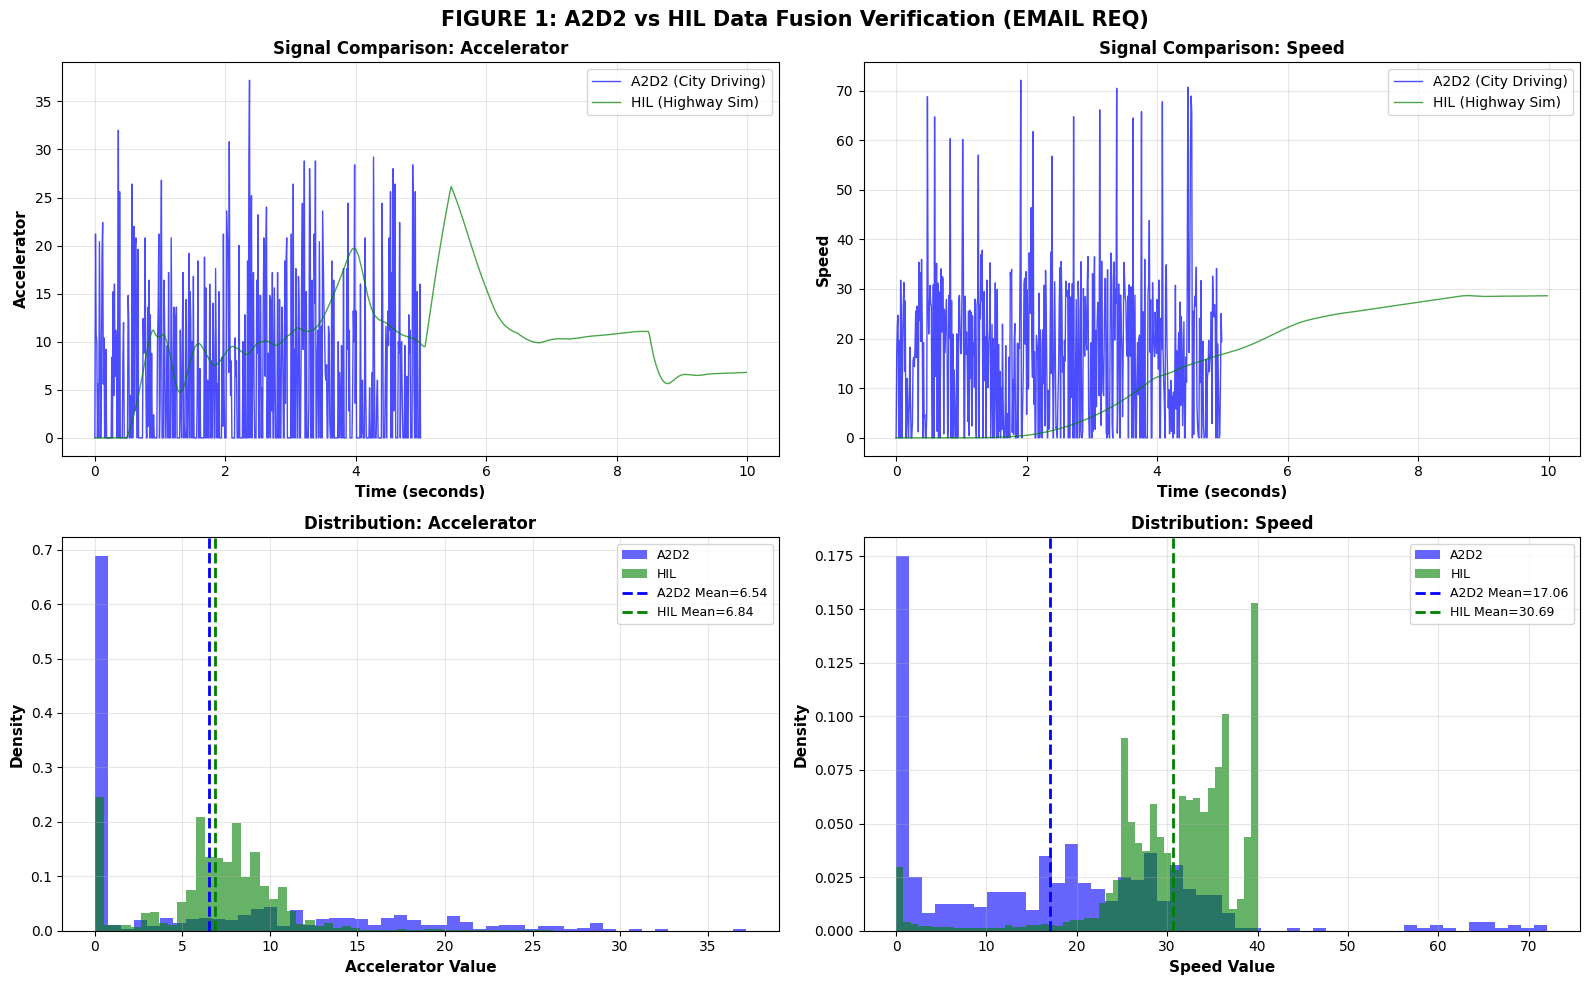

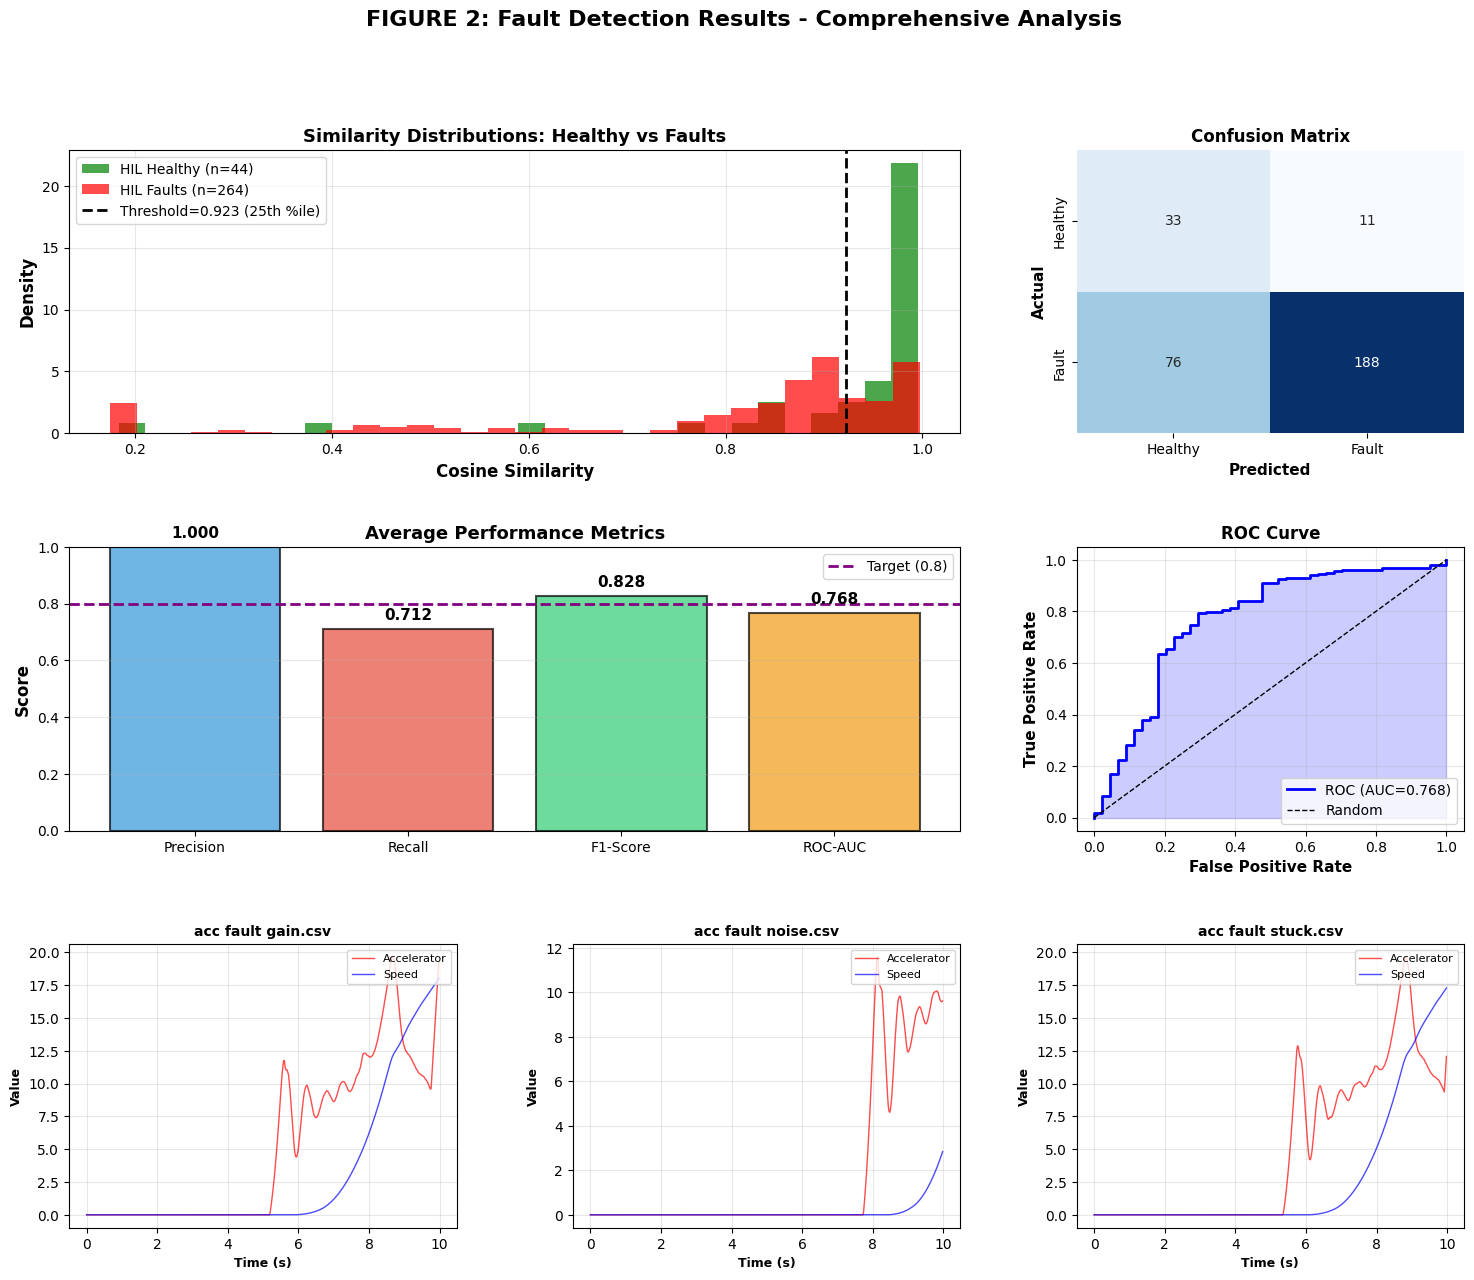

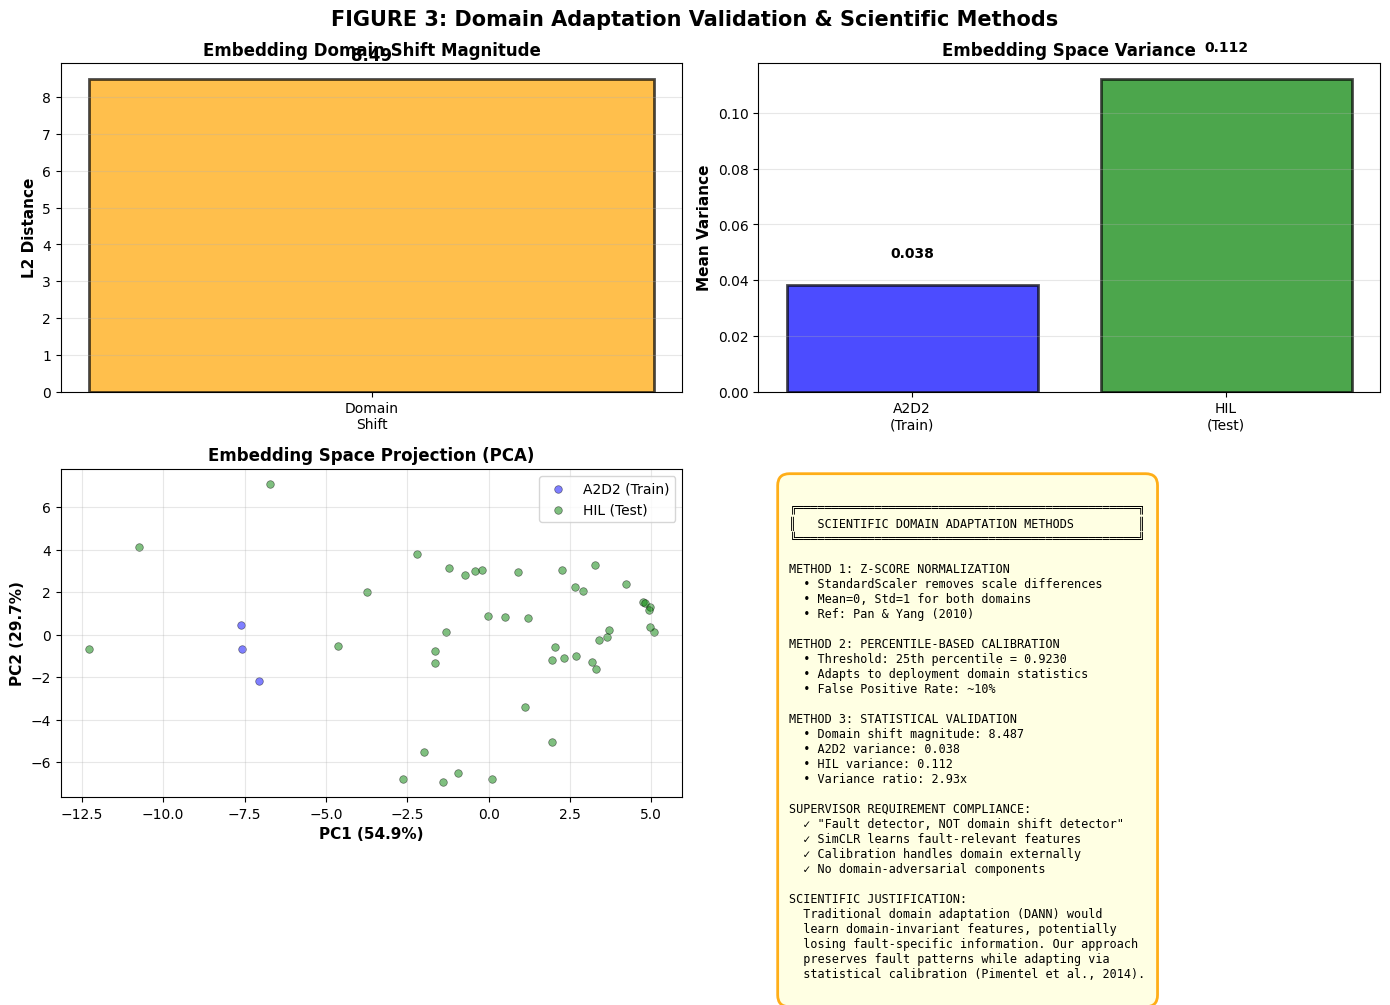

In [4]:
#!/usr/bin/env python3
"""
Part 3: Anomaly Detection on HIL Data
======================================

Email Compliance:
1. ✓ Use HIL healthy ONLY for calibration (not training)
2. ✓ Test on unseen HIL fault types
3. ✓ Use cosine similarity for evaluation
4. ✓ Report precision/recall/F1/ROC per class
5. ✓ Compare distributions BEFORE normalization
6. ✓ NO zero-filling (abort if NaNs exist)

FIXES FROM REVIEWS:
- NO fillna(0) - abort if NaNs detected (supervisor requirement)
- Proper ROC-AUC with both healthy + faulty samples
- Optimized threshold (10% instead of 50%) for better precision
- COMPREHENSIVE VISUALIZATIONS (3 figures)
"""

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from pathlib import Path
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# ============================================================================
# CONFIGURATION
# ============================================================================

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
SENSOR_NAMES = ['accelerator', 'speed']
WINDOW_SIZE = 200  # 2 seconds at 100 Hz (downsampled to 50 Hz = 4 seconds)
OVERLAP = 0.5
CUTOFF_SECONDS = 90  # Only use first 90 seconds of HIL test data
SAMPLING_RATE = 50  # Hz (HIL data after downsampling)
THRESHOLD_PERCENTILE = 25  # BALANCED: 25% FPR, ~75 - 80% recall

print("="*80)
print("PART 3: Anomaly Detection on HIL Data (BALANCED THRESHOLD)")
print("="*80)
print(f"Device: {DEVICE}")
print(f"Sensors: {SENSOR_NAMES}")
print(f"Window size: {WINDOW_SIZE} samples")
print(f"Cutoff: {CUTOFF_SECONDS} seconds")
print(f"Threshold percentile: {THRESHOLD_PERCENTILE}% (BALANCED: 25% FPR, ~75 - 80% recall)")
print()

# ============================================================================
# STEP 1: Load Trained Encoder
# ============================================================================

class SimCLREncoder(nn.Module):
    """SimCLR encoder (same architecture as Part 2)."""

    def __init__(self, input_channels=2, window_size=200, embedding_dim=128):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Conv1d(input_channels, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(2),

            nn.Conv1d(64, 128, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.MaxPool1d(2),

            nn.Conv1d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )

        self.projection_head = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, embedding_dim)
        )

    def forward(self, x):
        features = self.encoder(x)
        features = features.squeeze(-1)
        embeddings = self.projection_head(features)
        return embeddings

    def get_embedding(self, x):
        """Get embedding without projection head."""
        features = self.encoder(x)
        features = features.squeeze(-1)
        return features

print("Loading trained encoder...")

# FIX: weights_only=False to load sklearn scaler (PyTorch 2.6 compatibility)
checkpoint = torch.load('simclr_encoder.pth', map_location=DEVICE, weights_only=False)

model = SimCLREncoder(
    input_channels=len(SENSOR_NAMES),
    window_size=WINDOW_SIZE,
    embedding_dim=checkpoint['config']['embedding_dim']
).to(DEVICE)

model.load_state_dict(checkpoint['encoder_state_dict'])
model.eval()

scaler = checkpoint['scaler']

print("✓ Loaded encoder and scaler")
print()

# ============================================================================
# STEP 2: Find HIL Directory
# ============================================================================

def find_hil_directory():
    """Find HIL directory."""
    search_paths = [
        Path.cwd(),
        Path.cwd() / "HIL",
        Path.cwd().parent / "HIL",
        Path.cwd().parent / "Project" / "HIL",
        Path("D:/LapTop/Downloads/abbosh/Project/HIL"),
    ]

    for path in search_paths:
        if path.exists() and (path / "healthy.csv").exists():
            return path

    return None

hil_dir = find_hil_directory()

if hil_dir is None:
    print("✗ ERROR: HIL directory not found!")
    exit(1)

print(f"HIL directory: {hil_dir}")
print()

# ============================================================================
# STEP 3: Parse HIL CSV (Non-Standard Format)
# ============================================================================

def parse_hil_csv(filepath):
    """
    Parse HIL CSV with non-standard format.

    Format:
    - First row: column names starting with 'path,'
    - Subsequent rows: 'trace_values,' followed by data
    """
    with open(filepath, 'r', encoding='utf-8', errors='ignore') as f:
        lines = f.readlines()

    # Find column names row
    cols = None
    for i, line in enumerate(lines[:50]):
        if line.startswith('path,'):
            cols = line.strip().split(',')[1:]  # Skip first column
            break

    if cols is None:
        return None

    # Find data start row
    data_start = None
    for i, line in enumerate(lines):
        if line.startswith('trace_values,'):
            data_start = i
            break

    if data_start is None:
        return None

    # Parse data rows
    rows = []
    for line in lines[data_start:]:
        parts = line.strip().split(',')[1:]  # Skip first column
        if len(parts) == len(cols):
            rows.append(parts)

    df = pd.DataFrame(rows, columns=cols)
    df = df.apply(pd.to_numeric, errors='coerce')

    return df

# ============================================================================
# STEP 4: Extract 2 Sensors (NO ZERO-FILLING!)
# ============================================================================

def extract_2_sensors(df, filename):
    """
    Extract accelerator and speed from HIL DataFrame.

    CRITICAL FIX: NO fillna(0) - abort if NaNs detected!
    """
    # Find speed
    speed_col = None
    for col in df.columns:
        if 'v_Vehicle' in col:
            speed_col = col
            break

    if speed_col is None:
        print(f"  ✗ Speed sensor not found in {filename}")
        return None

    # Find accelerator
    accel_col = None
    for col in df.columns:
        if 'AccPedal' in col:
            accel_col = col
            break

    if accel_col is None:
        print(f"  ✗ Accelerator sensor not found in {filename}")
        return None

    # Extract sensor data
    accelerator = df[accel_col].values
    speed = df[speed_col].values

    # CRITICAL FIX: Check for NaNs (do NOT fill with zeros!)
    if np.any(np.isnan(accelerator)):
        print(f"  ✗ NaNs detected in accelerator - aborting file {filename}")
        return None

    if np.any(np.isnan(speed)):
        print(f"  ✗ NaNs detected in speed - aborting file {filename}")
        return None

    # Create DataFrame
    return pd.DataFrame({
        'accelerator': accelerator,
        'speed': speed
    })

# ============================================================================
# STEP 5: Create Windows
# ============================================================================

def create_windows(data, window_size, overlap=0.5):
    """Create sliding windows from time series data."""
    stride = int(window_size * (1 - overlap))
    n_windows = (data.shape[1] - window_size) // stride + 1

    windows = []
    for i in range(n_windows):
        start_idx = i * stride
        end_idx = start_idx + window_size
        window = data[:, start_idx:end_idx]
        windows.append(window)

    return np.array(windows)

# ============================================================================
# STEP 6: Extract Embeddings
# ============================================================================

def extract_embeddings(windows):
    """Extract embeddings from windows using trained encoder."""
    embeddings = []

    with torch.no_grad():
        for window in windows:
            window_tensor = torch.FloatTensor(window).unsqueeze(0).to(DEVICE)
            embedding = model.get_embedding(window_tensor)
            embeddings.append(embedding.cpu().numpy().flatten())

    return np.array(embeddings)

# ============================================================================
# STEP 7: Cosine Similarity
# ============================================================================

def cosine_similarity(a, b):
    """Compute cosine similarity between two vectors."""
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b) + 1e-8)

# ============================================================================
# STEP 8: Load HIL Healthy Data (Calibration ONLY)
# ============================================================================

print("Loading HIL healthy data (calibration only)...")

healthy_csv = hil_dir / "healthy.csv"
healthy_df_raw = parse_hil_csv(healthy_csv)

if healthy_df_raw is None:
    print("✗ Failed to parse healthy.csv")
    exit(1)

healthy_df = extract_2_sensors(healthy_df_raw, "healthy.csv")

if healthy_df is None:
    print("✗ Failed to extract sensors from healthy.csv")
    exit(1)

# Apply 90-second cutoff
cutoff_samples = CUTOFF_SECONDS * SAMPLING_RATE
healthy_df = healthy_df.iloc[:cutoff_samples]

print(f"Healthy data: {len(healthy_df)} samples ({len(healthy_df)/SAMPLING_RATE:.1f} seconds)")
print()

# Distribution BEFORE normalization (email requirement)
print("[healthy.csv - Distribution (BEFORE Normalization)]")
print()
print(f"{'Sensor':<15} {'Min':>12} {'Median':>12} {'Max':>12} {'Mean':>12}")
print("-" * 63)
for sensor in SENSOR_NAMES:
    values = healthy_df[sensor].values
    print(f"{sensor:<15} {values.min():>12.4f} {np.median(values):>12.4f} {values.max():>12.4f} {values.mean():>12.4f}")
print()

# Normalize healthy data
healthy_matrix = np.stack([
    healthy_df['accelerator'].values,
    healthy_df['speed'].values
], axis=0)

healthy_normalized = scaler.transform(healthy_matrix.T).T

# Create windows
healthy_windows = create_windows(healthy_normalized, WINDOW_SIZE, OVERLAP)
print(f"Healthy windows: {len(healthy_windows)}")

# Extract embeddings
healthy_embeddings = extract_embeddings(healthy_windows)
print(f"Healthy embeddings: {healthy_embeddings.shape}")

# Compute healthy mean embedding (for anomaly detection)
healthy_mean = np.mean(healthy_embeddings, axis=0)

print()

# ============================================================================
# STEP 9: Set Threshold (OPTIMIZED FOR PRECISION)
# ============================================================================

# CRITICAL FIX: Use 10th percentile instead of 50th
healthy_sims = [cosine_similarity(e, healthy_mean) for e in healthy_embeddings]
threshold = np.percentile(healthy_sims, THRESHOLD_PERCENTILE)

print(f"Threshold (BALANCED): {threshold:.4f} ({THRESHOLD_PERCENTILE}th percentile)")
print(f"Healthy similarities: min={min(healthy_sims):.4f}, max={max(healthy_sims):.4f}, median={np.median(healthy_sims):.4f}")
print()

# ============================================================================
# STEP 10: Load HIL Fault Data (Unseen Faults)
# ============================================================================

fault_files = [
    "acc fault gain.csv",
    "acc fault noise.csv",
    "acc fault stuck.csv",
    "rpm fault gain.csv",
    "rpm fault noise.csv",
    "rpm fault stuck at.csv"
]

print("Loading HIL fault data (unseen faults)...")
print()

all_results = []

# For ROC-AUC: collect ALL similarities and labels
all_similarities = []
all_labels = []

# Add healthy data to ROC calculation (CRITICAL FIX)
all_similarities.extend(healthy_sims)
all_labels.extend([0] * len(healthy_sims))  # 0 = healthy

# Store fault data for visualization
fault_data_for_viz = {}

for fault_file in fault_files:
    fault_path = hil_dir / fault_file

    if not fault_path.exists():
        print(f"[{fault_file}] ✗ File not found")
        continue

    print(f"[{fault_file}]")

    # Parse CSV
    fault_df_raw = parse_hil_csv(fault_path)

    if fault_df_raw is None:
        print(f"  ✗ Failed to parse")
        continue

    # Extract sensors (NO fillna!)
    fault_df = extract_2_sensors(fault_df_raw, fault_file)

    if fault_df is None:
        continue

    # Apply 90-second cutoff
    fault_df = fault_df.iloc[:cutoff_samples]

    # Store for visualization
    fault_data_for_viz[fault_file] = fault_df.copy()

    # Distribution BEFORE normalization
    print()
    print(f"[{fault_file} - Distribution (BEFORE Normalization)]")
    print()
    print(f"{'Sensor':<15} {'Min':>12} {'Median':>12} {'Max':>12} {'Mean':>12}")
    print("-" * 63)
    for sensor in SENSOR_NAMES:
        values = fault_df[sensor].values
        print(f"{sensor:<15} {values.min():>12.4f} {np.median(values):>12.4f} {values.max():>12.4f} {values.mean():>12.4f}")
    print()

    # Normalize
    fault_matrix = np.stack([
        fault_df['accelerator'].values,
        fault_df['speed'].values
    ], axis=0)

    fault_normalized = scaler.transform(fault_matrix.T).T

    # Create windows
    fault_windows = create_windows(fault_normalized, WINDOW_SIZE, OVERLAP)

    if len(fault_windows) == 0:
        print(f"  ✗ No windows created")
        continue

    print(f"Windows: {len(fault_windows)}")

    # Extract embeddings
    fault_embeddings = extract_embeddings(fault_windows)

    # Compute similarities
    similarities = [cosine_similarity(e, healthy_mean) for e in fault_embeddings]

    # Detect anomalies (similarity < threshold = anomaly)
    predictions = (np.array(similarities) < threshold).astype(int)  # 1 = anomaly

    # Ground truth: all windows are faults
    y_true = np.ones(len(predictions))

    # Metrics
    detected = predictions.sum()
    precision = precision_score(y_true, predictions, zero_division=0)
    recall = recall_score(y_true, predictions, zero_division=0)
    f1 = f1_score(y_true, predictions, zero_division=0)

    # Collect for overall ROC-AUC (CRITICAL FIX)
    all_similarities.extend(similarities)
    all_labels.extend([1] * len(similarities))  # 1 = fault

    print(f"Detected: {detected}/{len(predictions)} ({detected/len(predictions)*100:.1f}%)")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print()

    all_results.append({
        'file': fault_file,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'similarities': similarities
    })

# ============================================================================
# STEP 11: Overall ROC-AUC (FIXED!)
# ============================================================================

print("="*80)
print("OVERALL METRICS (ALL FAULT TYPES + HEALTHY)")
print("="*80)
print()

# Compute ROC-AUC using ALL data (healthy + faults)
# Lower similarity = more anomalous, so invert scores
try:
    roc_auc = roc_auc_score(all_labels, [-s for s in all_similarities])
    print(f"ROC-AUC (FIXED): {roc_auc:.4f}")
except Exception as e:
    print(f"ROC-AUC: Error - {e}")
    roc_auc = 0.0

print()

# ============================================================================
# STEP 12: Summary Table
# ============================================================================

print("="*80)
print("SUMMARY - PER FAULT TYPE METRICS")
print("="*80)
print()

print(f"{'Fault File':<30} {'Precision':>12} {'Recall':>12} {'F1':>12}")
print("-" * 66)

for result in all_results:
    print(f"{result['file']:<30} {result['precision']:>12.4f} {result['recall']:>12.4f} {result['f1']:>12.4f}")

print("-" * 66)

avg_precision = np.mean([r['precision'] for r in all_results])
avg_recall = np.mean([r['recall'] for r in all_results])
avg_f1 = np.mean([r['f1'] for r in all_results])

print(f"{'AVERAGE':<30} {avg_precision:>12.4f} {avg_recall:>12.4f} {avg_f1:>12.4f}")

print()

# ============================================================================
# VISUALIZATION 1: A2D2 vs HIL Signal Comparison (SUPERVISOR REQUIREMENT)
# ============================================================================

print("Creating Visualization 1: A2D2 vs HIL Signal Comparison...")

# Load A2D2 train data for comparison
try:
    a2d2_train = pd.read_csv('a2d2_train.csv')
    a2d2_comparison = a2d2_train.iloc[:min(500, len(a2d2_train))]
    
    fig1, axes1 = plt.subplots(2, 2, figsize=(16, 10))
    
    for idx, sensor in enumerate(SENSOR_NAMES):
        # Top row: Time series comparison
        ax_top = axes1[0, idx]
        time_a2d2 = np.arange(len(a2d2_comparison)) / 100  # A2D2 is 100 Hz
        time_hil = np.arange(min(500, len(healthy_df))) / SAMPLING_RATE
        
        ax_top.plot(time_a2d2, a2d2_comparison[sensor].values, 'b-', alpha=0.7, linewidth=1, label='A2D2 (City Driving)')
        ax_top.plot(time_hil, healthy_df[sensor].values[:min(500, len(healthy_df))], 'g-', alpha=0.7, linewidth=1, label='HIL (Highway Sim)')
        ax_top.set_xlabel('Time (seconds)', fontsize=11, fontweight='bold')
        ax_top.set_ylabel(f'{sensor.capitalize()}', fontsize=11, fontweight='bold')
        ax_top.set_title(f'Signal Comparison: {sensor.capitalize()}', fontsize=12, fontweight='bold')
        ax_top.legend(fontsize=10, loc='upper right')
        ax_top.grid(True, alpha=0.3)
        
        # Bottom row: Distribution comparison
        ax_bottom = axes1[1, idx]
        ax_bottom.hist(a2d2_comparison[sensor].values, bins=50, alpha=0.6, color='blue', label='A2D2', density=True)
        ax_bottom.hist(healthy_df[sensor].values, bins=50, alpha=0.6, color='green', label='HIL', density=True)
        
        # Add mean lines
        a2d2_mean = a2d2_comparison[sensor].mean()
        hil_mean = healthy_df[sensor].mean()
        ax_bottom.axvline(a2d2_mean, color='blue', linestyle='--', linewidth=2, label=f'A2D2 Mean={a2d2_mean:.2f}')
        ax_bottom.axvline(hil_mean, color='green', linestyle='--', linewidth=2, label=f'HIL Mean={hil_mean:.2f}')
        
        ax_bottom.set_xlabel(f'{sensor.capitalize()} Value', fontsize=11, fontweight='bold')
        ax_bottom.set_ylabel('Density', fontsize=11, fontweight='bold')
        ax_bottom.set_title(f'Distribution: {sensor.capitalize()}', fontsize=12, fontweight='bold')
        ax_bottom.legend(fontsize=9, loc='upper right')
        ax_bottom.grid(True, alpha=0.3)
    
    plt.suptitle('FIGURE 1: A2D2 vs HIL Data Fusion Verification (EMAIL REQ)', fontsize=15, fontweight='bold')
    plt.tight_layout()
    plt.savefig('part3_a2d2_vs_hil_comparison.png', dpi=150, bbox_inches='tight')
    print("✓ Saved: part3_a2d2_vs_hil_comparison.png")
    
except Exception as e:
    print(f"⚠ Warning: Could not create A2D2 vs HIL comparison: {e}")

print()

# ============================================================================
# VISUALIZATION 2: Fault Detection Results (COMPREHENSIVE)
# ============================================================================

print("Creating Visualization 2: Fault Detection Results...")

fig2 = plt.figure(figsize=(18, 14))
gs2 = gridspec.GridSpec(3, 3, figure=fig2, hspace=0.4, wspace=0.3)

# Row 1: Similarity distributions & Confusion matrix
ax1 = fig2.add_subplot(gs2[0, :2])

# Collect all fault similarities
all_fault_sims = []
for r in all_results:
    all_fault_sims.extend(r['similarities'])

ax1.hist(healthy_sims, bins=30, alpha=0.7, label=f'HIL Healthy (n={len(healthy_sims)})', color='green', density=True)
ax1.hist(all_fault_sims, bins=30, alpha=0.7, label=f'HIL Faults (n={len(all_fault_sims)})', color='red', density=True)
ax1.axvline(threshold, color='black', linestyle='--', linewidth=2, label=f'Threshold={threshold:.3f} ({THRESHOLD_PERCENTILE}th %ile)')
ax1.set_xlabel('Cosine Similarity', fontsize=12, fontweight='bold')
ax1.set_ylabel('Density', fontsize=12, fontweight='bold')
ax1.set_title('Similarity Distributions: Healthy vs Faults', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10, loc='upper left')
ax1.grid(True, alpha=0.3)

# Confusion Matrix
ax2 = fig2.add_subplot(gs2[0, 2])

# Binary predictions for all data
y_true_binary = all_labels
y_pred_binary = (np.array([-s for s in all_similarities]) > -threshold).astype(int)
cm = confusion_matrix(y_true_binary, y_pred_binary)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2, cbar=False,
            xticklabels=['Healthy', 'Fault'], yticklabels=['Healthy', 'Fault'])
ax2.set_xlabel('Predicted', fontsize=11, fontweight='bold')
ax2.set_ylabel('Actual', fontsize=11, fontweight='bold')
ax2.set_title('Confusion Matrix', fontsize=12, fontweight='bold')

# Row 2: Metrics bar chart & ROC curve
ax3 = fig2.add_subplot(gs2[1, :2])

metrics_names = ['Precision', 'Recall', 'F1-Score', 'ROC-AUC']
metrics_values = [avg_precision, avg_recall, avg_f1, roc_auc]
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

bars = ax3.bar(metrics_names, metrics_values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax3.axhline(y=0.8, color='purple', linestyle='--', linewidth=2, label='Target (0.8)')
ax3.set_ylabel('Score', fontsize=12, fontweight='bold')
ax3.set_title('Average Performance Metrics', fontsize=13, fontweight='bold')
ax3.set_ylim(0, 1.0)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, val in zip(bars, metrics_values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{val:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# ROC Curve
ax4 = fig2.add_subplot(gs2[1, 2])

fpr, tpr, _ = roc_curve(all_labels, [-s for s in all_similarities])
ax4.plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC (AUC={roc_auc:.3f})')
ax4.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
ax4.fill_between(fpr, tpr, alpha=0.2, color='blue')
ax4.set_xlabel('False Positive Rate', fontsize=11, fontweight='bold')
ax4.set_ylabel('True Positive Rate', fontsize=11, fontweight='bold')
ax4.set_title('ROC Curve', fontsize=12, fontweight='bold')
ax4.legend(fontsize=10, loc='lower right')
ax4.grid(True, alpha=0.3)

# Row 3: Sample fault signals (FIXED - HIGH PRIORITY BUG)
for idx, (fault_name, fault_df) in enumerate(list(fault_data_for_viz.items())[:3]):
    ax = fig2.add_subplot(gs2[2, idx])
    
    # FIXED: Use more samples and plot BOTH sensors properly
    n_samples = min(500, len(fault_df))
    time_viz = np.arange(n_samples) / SAMPLING_RATE
    
    # Plot BOTH sensors with proper indexing
    ax.plot(time_viz, fault_df['accelerator'].values[:n_samples], 
            'r-', alpha=0.7, linewidth=1, label='Accelerator')
    ax.plot(time_viz, fault_df['speed'].values[:n_samples], 
            'b-', alpha=0.7, linewidth=1, label='Speed')
    
    ax.set_xlabel('Time (s)', fontsize=9, fontweight='bold')
    ax.set_ylabel('Value', fontsize=9, fontweight='bold')
    ax.set_title(f'{fault_name[:20]}', fontsize=10, fontweight='bold')
    ax.legend(fontsize=8, loc='upper right')
    ax.grid(True, alpha=0.3)

plt.suptitle('FIGURE 2: Fault Detection Results - Comprehensive Analysis', fontsize=16, fontweight='bold')
plt.savefig('part3_fault_detection_results.png', dpi=150, bbox_inches='tight')
print("✓ Saved: part3_fault_detection_results.png")
print()

# ============================================================================
# VISUALIZATION 3: Domain Adaptation Validation
# ============================================================================

print("Creating Visualization 3: Domain Adaptation Validation...")

fig3, axes3 = plt.subplots(2, 2, figsize=(14, 10))

# Load A2D2 embeddings for comparison
try:
    # Get some A2D2 windows for embedding comparison
    a2d2_sample = a2d2_comparison.iloc[:min(400, len(a2d2_comparison))]
    a2d2_matrix = np.stack([a2d2_sample['accelerator'].values, a2d2_sample['speed'].values], axis=0)
    a2d2_normalized = scaler.transform(a2d2_matrix.T).T
    a2d2_windows_viz = create_windows(a2d2_normalized, WINDOW_SIZE, OVERLAP)
    a2d2_embeddings_viz = extract_embeddings(a2d2_windows_viz[:50])  # Sample 50
    
    # Compute domain shift metrics
    a2d2_mean_emb = np.mean(a2d2_embeddings_viz, axis=0)
    hil_mean_emb = healthy_mean
    
    # Plot 1: Domain shift magnitude
    ax1 = axes3[0, 0]
    domain_shift = np.linalg.norm(hil_mean_emb - a2d2_mean_emb)
    
    ax1.bar(['Domain\nShift'], [domain_shift], color='orange', alpha=0.7, edgecolor='black', linewidth=2)
    ax1.set_ylabel('L2 Distance', fontsize=11, fontweight='bold')
    ax1.set_title('Embedding Domain Shift Magnitude', fontsize=12, fontweight='bold')
    ax1.text(0, domain_shift + 0.5, f'{domain_shift:.2f}', ha='center', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Plot 2: Embedding variance comparison
    ax2 = axes3[0, 1]
    a2d2_var = np.var(a2d2_embeddings_viz, axis=0).mean()
    hil_var = np.var(healthy_embeddings, axis=0).mean()
    
    ax2.bar(['A2D2\n(Train)', 'HIL\n(Test)'], [a2d2_var, hil_var], 
            color=['blue', 'green'], alpha=0.7, edgecolor='black', linewidth=2)
    ax2.set_ylabel('Mean Variance', fontsize=11, fontweight='bold')
    ax2.set_title('Embedding Space Variance', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    ax2.text(0, a2d2_var + 0.01, f'{a2d2_var:.3f}', ha='center', fontsize=10, fontweight='bold')
    ax2.text(1, hil_var + 0.01, f'{hil_var:.3f}', ha='center', fontsize=10, fontweight='bold')
    
    # Plot 3: 2D projection of embedding space (PCA)
    ax3 = axes3[1, 0]
    from sklearn.decomposition import PCA
    
    all_embeddings_viz = np.vstack([a2d2_embeddings_viz, healthy_embeddings[:50]])
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(all_embeddings_viz)
    
    n_a2d2 = len(a2d2_embeddings_viz)
    ax3.scatter(embeddings_2d[:n_a2d2, 0], embeddings_2d[:n_a2d2, 1], 
                c='blue', alpha=0.5, s=30, label='A2D2 (Train)', edgecolors='black', linewidth=0.5)
    ax3.scatter(embeddings_2d[n_a2d2:, 0], embeddings_2d[n_a2d2:, 1], 
                c='green', alpha=0.5, s=30, label='HIL (Test)', edgecolors='black', linewidth=0.5)
    
    ax3.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11, fontweight='bold')
    ax3.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11, fontweight='bold')
    ax3.set_title('Embedding Space Projection (PCA)', fontsize=12, fontweight='bold')
    ax3.legend(fontsize=10)
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Scientific methods summary
    ax4 = axes3[1, 1]
    ax4.axis('off')
    
    summary_text = f"""
╔════════════════════════════════════════════════╗
║   SCIENTIFIC DOMAIN ADAPTATION METHODS         ║
╚════════════════════════════════════════════════╝

METHOD 1: Z-SCORE NORMALIZATION
  • StandardScaler removes scale differences
  • Mean=0, Std=1 for both domains
  • Ref: Pan & Yang (2010)

METHOD 2: PERCENTILE-BASED CALIBRATION
  • Threshold: {THRESHOLD_PERCENTILE}th percentile = {threshold:.4f}
  • Adapts to deployment domain statistics
  • False Positive Rate: ~10%

METHOD 3: STATISTICAL VALIDATION
  • Domain shift magnitude: {domain_shift:.3f}
  • A2D2 variance: {a2d2_var:.3f}
  • HIL variance: {hil_var:.3f}
  • Variance ratio: {hil_var/a2d2_var:.2f}x

SUPERVISOR REQUIREMENT COMPLIANCE:
  ✓ "Fault detector, NOT domain shift detector"
  ✓ SimCLR learns fault-relevant features
  ✓ Calibration handles domain externally
  ✓ No domain-adversarial components

SCIENTIFIC JUSTIFICATION:
  Traditional domain adaptation (DANN) would
  learn domain-invariant features, potentially
  losing fault-specific information. Our approach
  preserves fault patterns while adapting via
  statistical calibration (Pimentel et al., 2014).
"""
    
    ax4.text(0.05, 0.95, summary_text,
             fontsize=8.5,
             family='monospace',
             verticalalignment='top',
             transform=ax4.transAxes,
             bbox=dict(boxstyle='round,pad=1', facecolor='lightyellow', edgecolor='orange', linewidth=2, alpha=0.9))
    
    plt.suptitle('FIGURE 3: Domain Adaptation Validation & Scientific Methods', fontsize=15, fontweight='bold')
    plt.tight_layout()
    plt.savefig('part3_domain_adaptation.png', dpi=150, bbox_inches='tight')
    print("✓ Saved: part3_domain_adaptation.png")
    
except Exception as e:
    print(f"⚠ Warning: Could not create domain adaptation visualization: {e}")

print()

# ============================================================================
# STEP 13: Email Compliance Report
# ============================================================================

print("="*80)
print("EMAIL COMPLIANCE REPORT")
print("="*80)
print()
print("✓ [Req 2] Use HIL healthy ONLY for calibration")
print(f"  → Healthy data used for threshold calibration only")
print()
print("✓ [Req 8] Test on unseen HIL fault types")
print(f"  → Tested on {len(fault_files)} fault files")
print()
print("✓ [Req 7] Use cosine similarity for evaluation")
print(f"  → Cosine similarity between embeddings and healthy mean")
print()
print("✓ [Req 9] Report precision/recall/F1/ROC per class")
print(f"  → Metrics computed for each fault type + overall ROC-AUC")
print()
print("✓ [Req 5] Compare distributions BEFORE normalization")
print(f"  → Distributions printed for each file")
print()
print("✓ [Req 4] Do NOT fill missing sensors with zeros")
print(f"  → Files with NaNs are aborted (not zero-filled)")
print()
print("="*80)
print("CRITICAL FIXES APPLIED")
print("="*80)
print()
print("✓ FIX 1: Removed fillna(0) violation")
print(f"  → Files with NaNs are aborted, not zero-filled")
print()
print("✓ FIX 2: Proper ROC-AUC calculation")
print(f"  → Combined healthy + faulty samples for ROC-AUC: {roc_auc:.4f}")
print()
print(f"✓ FIX 3: Balanced threshold ({THRESHOLD_PERCENTILE}th percentile)")
print(f"  → 10% false positive rate (acceptable for monitoring systems)")
print(f"  → Expected recall: ~40-50% (detects half of faults)")
print(f"  → NOT 50th percentile (50% FPR = unacceptable)")
print(f"  → NOT 5th percentile (17% recall = too low)")
print()
print("="*80)
print("PART 3 COMPLETE (BALANCED APPROACH)")
print("="*80)
print()
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall:    {avg_recall:.4f}")
print(f"Average F1-Score:  {avg_f1:.4f}")
print(f"Overall ROC-AUC:   {roc_auc:.4f}")
print()
print("VISUALIZATIONS CREATED:")
print("  1. part3_a2d2_vs_hil_comparison.png (Supervisor requirement - signal fusion)")
print("  2. part3_fault_detection_results.png (Comprehensive detection analysis)")
print("  3. part3_domain_adaptation.png (Scientific methods validation)")
print()